<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [2]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-12 21:15:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  68.9MB/s    in 2.9s    

2025-07-12 21:15:27 (68.9 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 135.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 171.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 109.1 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [32]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [33]:
# QUERY = """
# SELECT name as Table_Name 
# FROM sqlite_master 
# WHERE type = 'table'
# """
# pd.read_sql_query(QUERY, conn)

QUERY="""
PRAGMA table_info(main);
"""
df_describe = pd.read_sql_query(QUERY, conn) 

In [36]:
#df_describe["name"].unique()

**Demo 3: Group data by age**


In [9]:
# QUERY = """
# SELECT Age, COUNT(*) as count 
# FROM main 
# GROUP BY Age 
# ORDER BY Age
# """
# df_age = pd.read_sql_query(QUERY, conn)
# print(df_age)

## Hands-on Lab: Visualizing Data with Histograms


In [11]:
QUERY = """
SELECT Age,CompTotal,YearsCodePro,TimeSearching,DatabaseWantToWorkWith,RemoteWork,JobSat FROM main 
"""
df= pd.read_sql_query(QUERY, conn)
df.head()

,Age,CompTotal,YearsCodePro,TimeSearching,DatabaseWantToWorkWith,RemoteWork,JobSat
0,Under 18 years old,NaN,None,None,None,Remote,NaN
1,35-44 years old,NaN,17,None,PostgreSQL,Remote,NaN
2,45-54 years old,NaN,27,None,Firebase Realtime Database,Remote,NaN
3,18-24 years old,NaN,None,None,MongoDB;MySQL;PostgreSQL,None,NaN
4,18-24 years old,NaN,None,None,PostgreSQL;SQLite,None,NaN


In [15]:
df.dtypes

Age                        object
CompTotal                 float64
YearsCodePro               object
TimeSearching              object
DatabaseWantToWorkWith     object
RemoteWork                 object
JobSat                    float64
dtype: object

In [26]:
#df["YearsCodePro"].value_counts()

### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


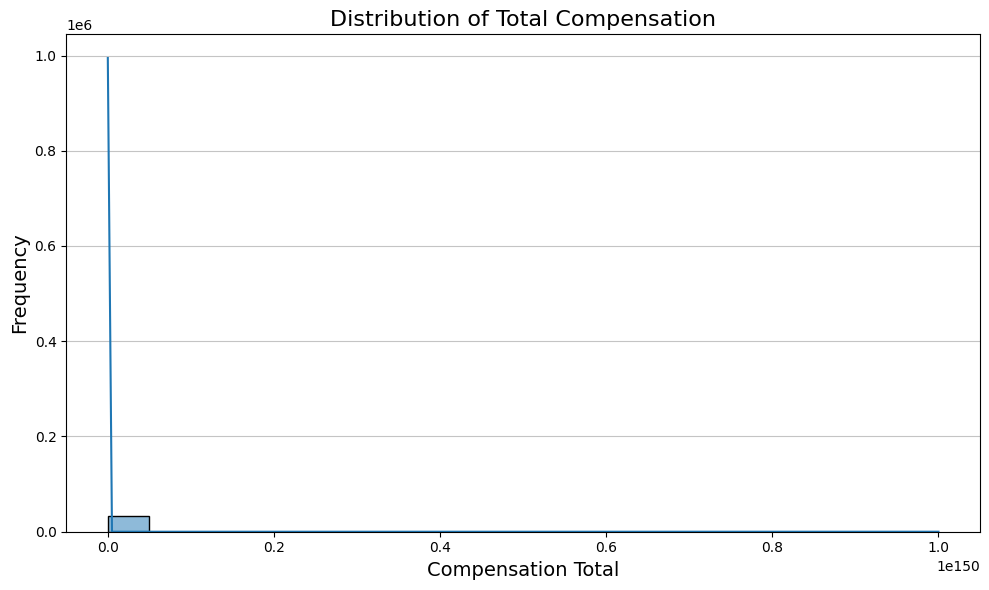

In [12]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.histplot(df['CompTotal'], bins=20, kde=True) # You can adjust 'bins' as needed
plt.title('Distribution of Total Compensation', fontsize=16)
plt.xlabel('Compensation Total', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show() 

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


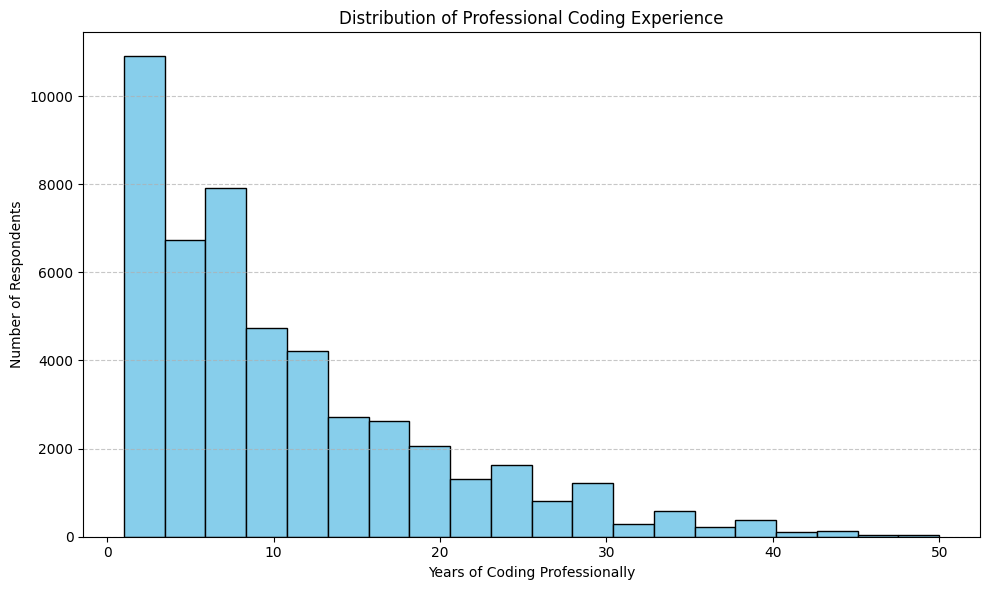

In [13]:
## Write your code here
#df['YearsCodePro'].value_counts()
#df.replace("Less than 1 year", 1, inplace=True)
#df.replace("More than 50 years", 50, inplace=True)

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
years = df['YearsCodePro'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(years, bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Professional Coding Experience')
plt.xlabel('Years of Coding Professionally')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


In [24]:
#df["Age"].value_counts()
#df["YearsCodePro"].value_counts()

**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


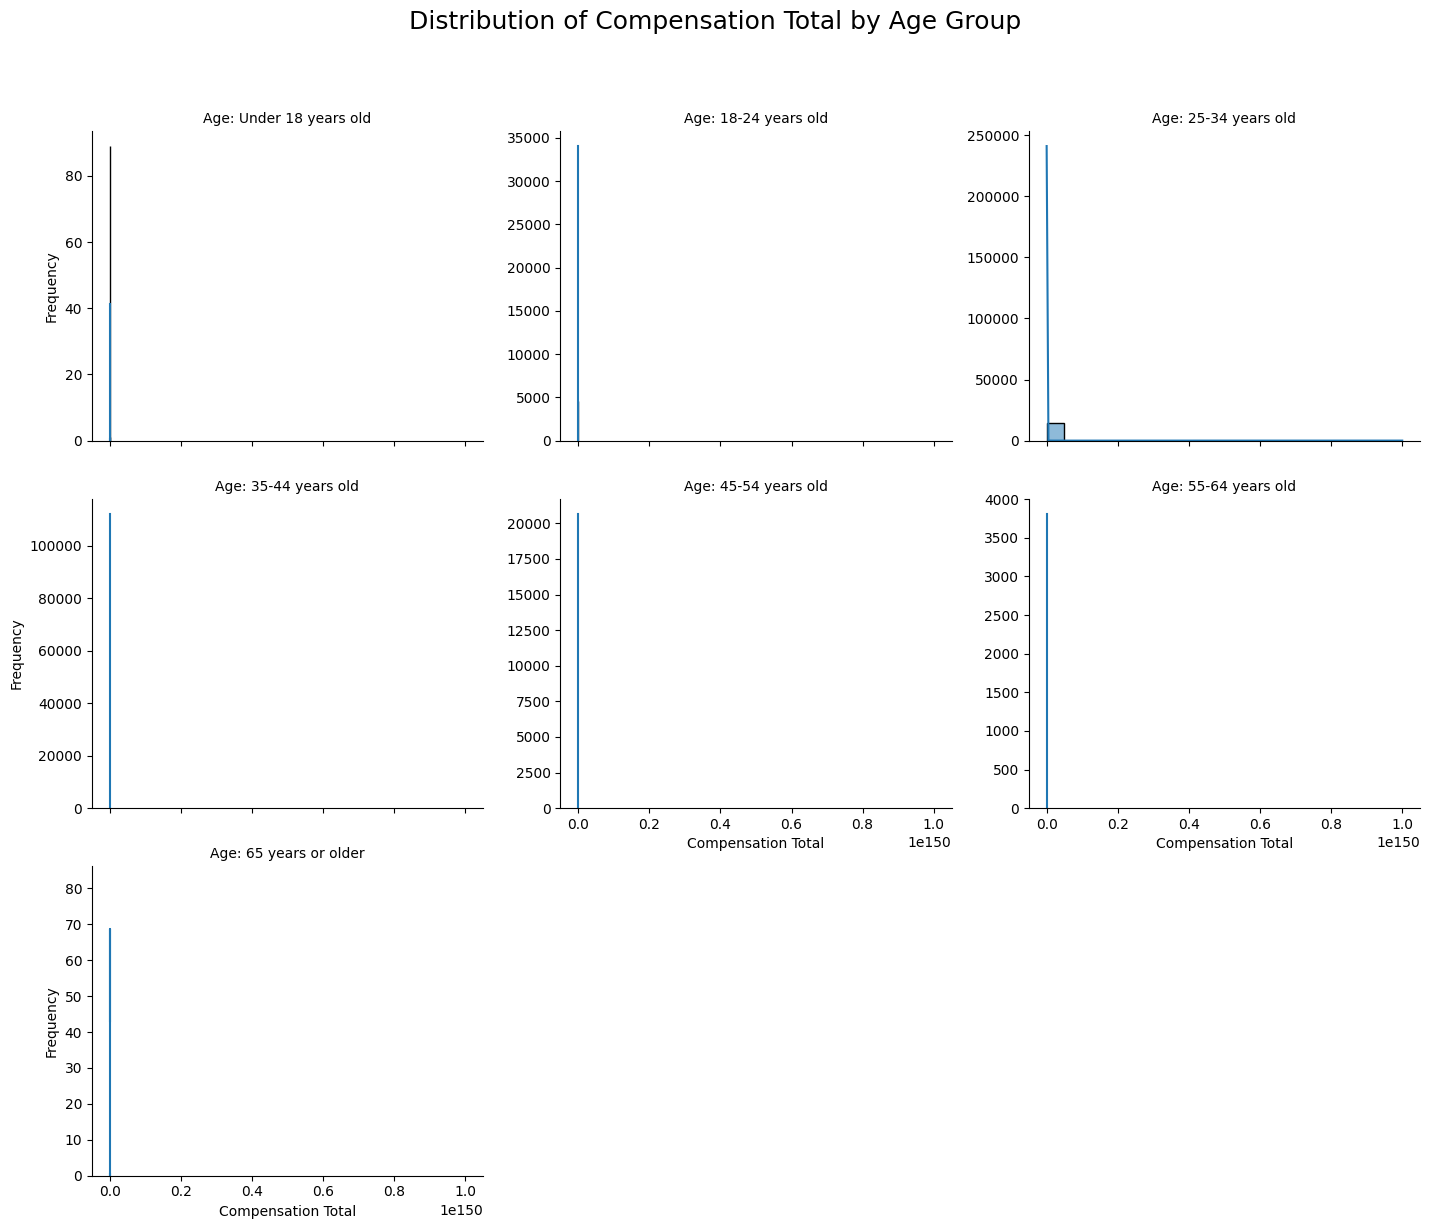

In [17]:
## Write your code here
ordered_age_categorieslist = df['Age'].unique()
# Filter out 'Prefer not to say' and set the categorical order
df_filtered = df[df['Age'] != 'Prefer not to say'].copy()
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=ordered_age_categories, ordered=True)

# Drop any rows where 'Age' might be NaN after filtering or conversion if it happened earlier
df_filtered.dropna(subset=['Age', 'CompTotal'], inplace=True)

# Create a FacetGrid to plot histograms for each Age group
# col_wrap controls how many plots per row
g = sns.FacetGrid(df_filtered, col='Age', col_wrap=3, height=4, aspect=1.2,
                  sharex=True, sharey=False) # sharex=True keeps x-axis scales consistent

# Map the histplot to each facet
g.map(sns.histplot, 'CompTotal', kde=True, bins=20) # You can adjust 'bins' as needed

# Set titles and labels for clarity
g.set_titles("Age: {col_name}") # Titles for each subplot
g.set_axis_labels("Compensation Total", "Frequency") # Labels for x and y axes
g.fig.suptitle('Distribution of Compensation Total by Age Group', y=1.02, fontsize=18) # Overall title

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


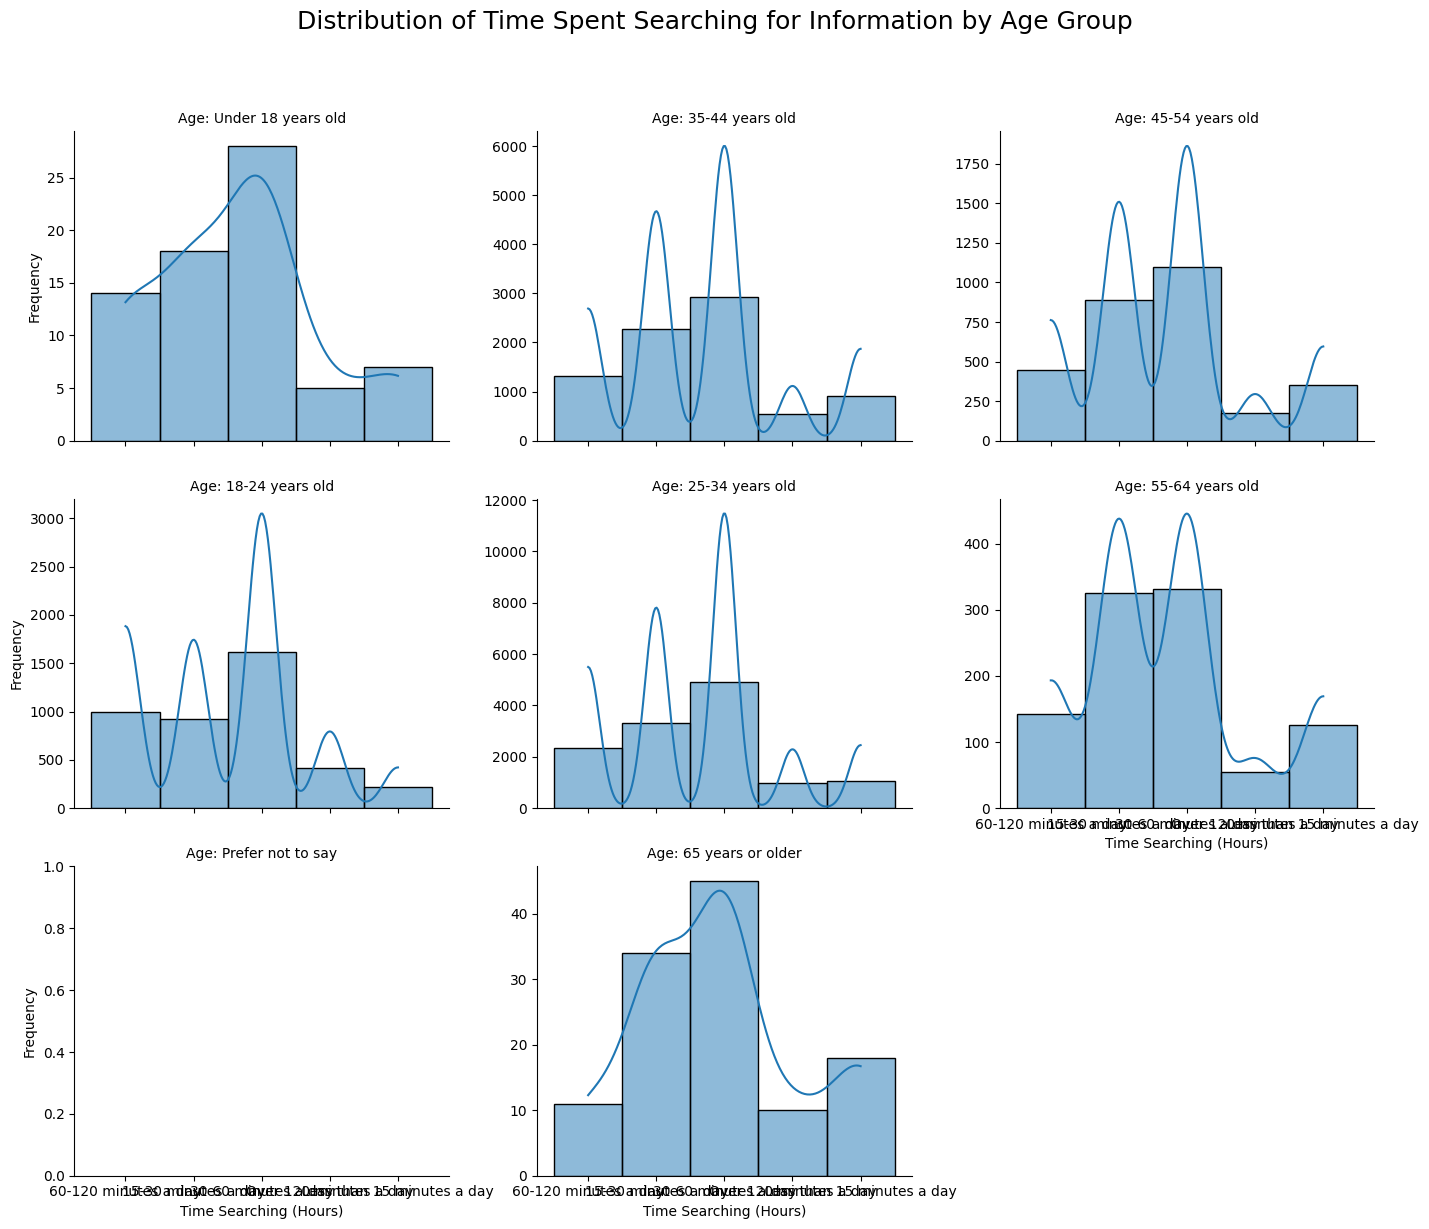

In [18]:
## Write your code here
df_filtered = df[df['Age'] != 'Prefer not to say'].copy()
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=ordered_age_categorieslist, ordered=True)

# Drop any rows where 'Age' or 'TimeSearching' might be NaN for this analysis
df_filtered.dropna(subset=['Age', 'TimeSearching'], inplace=True)

# Create a FacetGrid to plot histograms for TimeSearching for each Age group
# col_wrap controls how many plots per row
g = sns.FacetGrid(df_filtered, col='Age', col_wrap=3, height=4, aspect=1.2,
                  sharex=True, sharey=False) # sharex=True keeps x-axis scales consistent if relevant

# Map the histplot to each facet
g.map(sns.histplot, 'TimeSearching', kde=True, bins=5) # Adjust 'bins' as needed

# Set titles and labels for clarity
g.set_titles("Age: {col_name}") # Titles for each subplot
g.set_axis_labels("Time Searching (Hours)", "Frequency") # Labels for x and y axes
g.fig.suptitle('Distribution of Time Spent Searching for Information by Age Group', y=1.02, fontsize=18) # Overall title

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


/tmp/ipykernel_298/3022818489.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_databases.index, y=top_5_databases.values, palette='viridis')


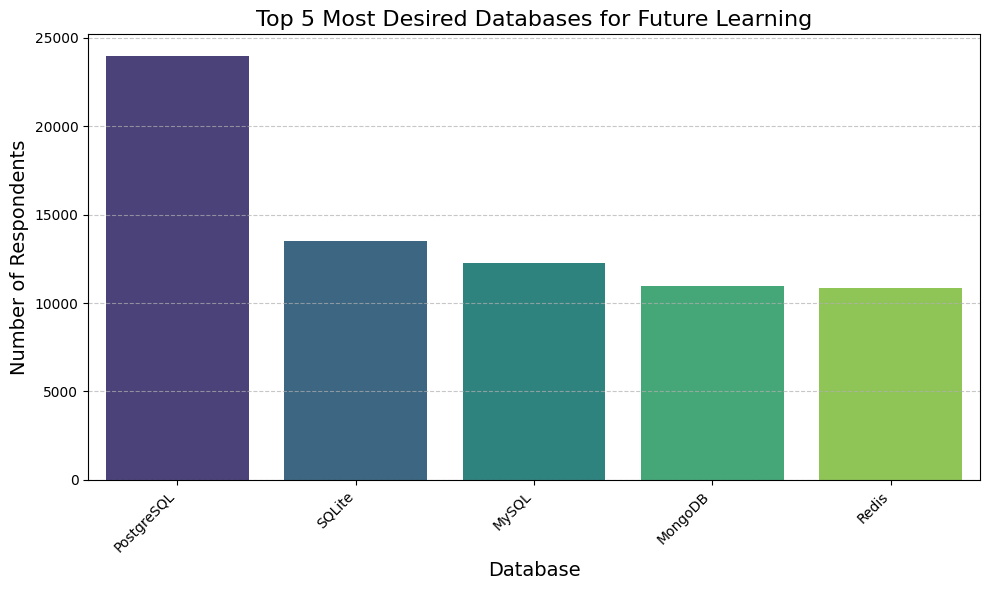

In [19]:
## Write your code here
all_databases = df['DatabaseWantToWorkWith'].dropna().str.split(';', expand=True).stack()
all_databases = all_databases.str.strip() # Remove any leading/trailing whitespace

# --- Step 2: Get the value counts of each database ---
database_counts = all_databases.value_counts()

# --- Step 3: Select the top 5 databases ---
top_5_databases = database_counts.head(5)

# --- Step 4: Create the bar chart ---
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_databases.index, y=top_5_databases.values, palette='viridis')

plt.title('Top 5 Most Desired Databases for Future Learning', fontsize=16)
plt.xlabel('Database', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


/tmp/ipykernel_298/2315458520.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_work_counts.index, y=remote_work_counts.values, palette='Blues_d')


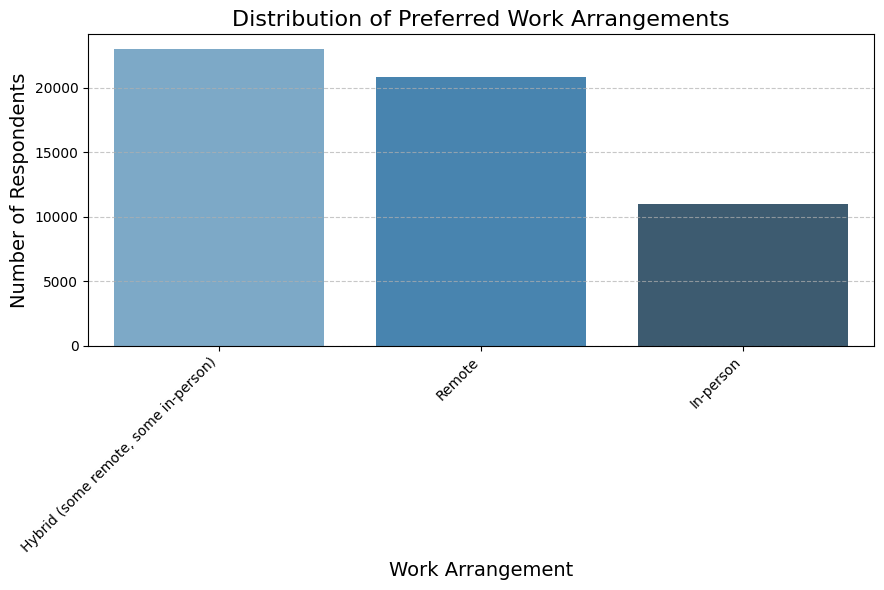

In [20]:
## Write your code here
remote_work_counts = df['RemoteWork'].value_counts()

# Create the count plot (which is a type of bar chart for counts)
plt.figure(figsize=(9, 6))
sns.barplot(x=remote_work_counts.index, y=remote_work_counts.values, palette='Blues_d')

plt.title('Distribution of Preferred Work Arrangements', fontsize=16)
plt.xlabel('Work Arrangement', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they are long
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


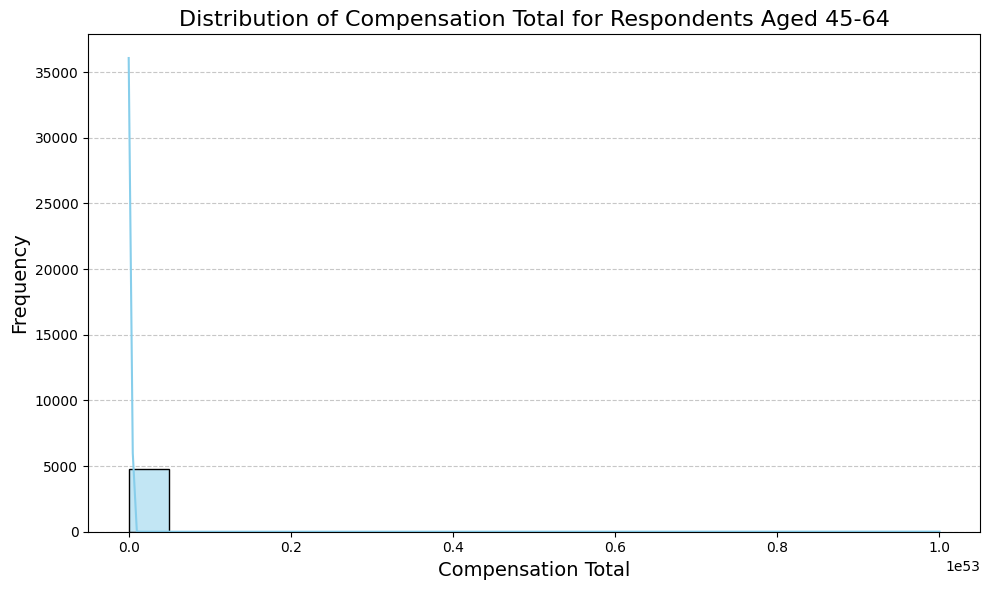

In [22]:
## Write your code here
# Define the age groups to filter
target_age_groups = ['45-54 years old', '55-64 years old']

# Filter the DataFrame for the specified age groups
df_mid_career = df[df['Age'].isin(target_age_groups)].copy()

# Drop any rows where 'CompTotal' might be NaN in the filtered data
df_mid_career.dropna(subset=['CompTotal'], inplace=True)

# Plot the histogram for CompTotal for mid-career respondents
plt.figure(figsize=(10, 6))
sns.histplot(df_mid_career['CompTotal'], bins=20, kde=True, color='skyblue')

plt.title('Distribution of Compensation Total for Respondents Aged 45-64', fontsize=16)
plt.xlabel('Compensation Total', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


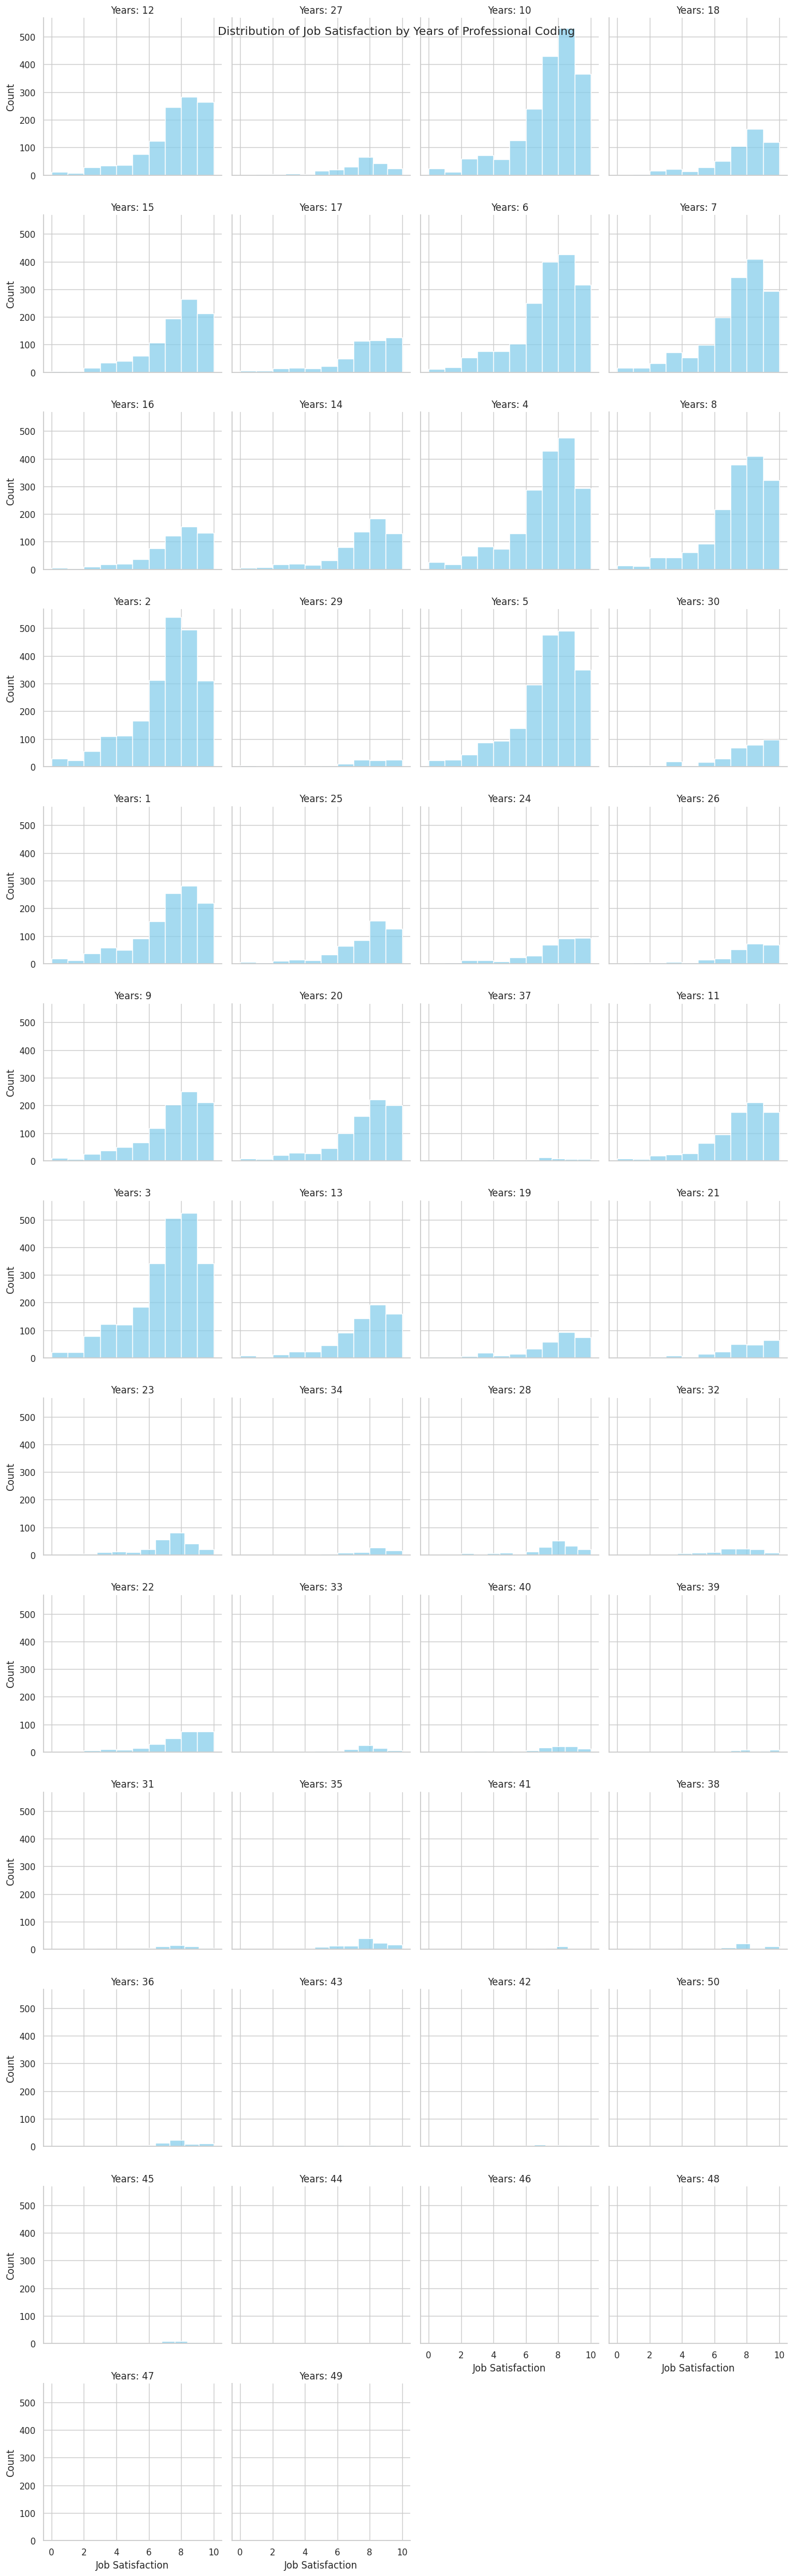

In [29]:
## Write your code here
# Clean and convert types
# Drop NaNs
df = df.copy()
df = df[pd.to_numeric(df['YearsCodePro'], errors='coerce').notnull()]
df['YearsCodePro'] = df['YearsCodePro'].astype(float)
df = df[pd.to_numeric(df['JobSat'], errors='coerce').notnull()]
df['JobSat'] = df['JobSat'].astype(float)
df = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Define ordered years for better plot organization (optional)
#ordered_years = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0, 15.0, 20.0]
ordered_years = list(df['YearsCodePro'].unique())
filtered_df = df[df['YearsCodePro'].isin(ordered_years)]

# Plot
sns.set(style="whitegrid")
g = sns.FacetGrid(filtered_df, 
                  col='YearsCodePro', col_wrap=4, col_order=ordered_years, 
                  sharex=True, sharey=True, height=3.5)
g.map_dataframe(sns.histplot, x='JobSat', bins=10, kde=False, color='skyblue')
g.set_axis_labels("Job Satisfaction", "Count")
g.set_titles("Years: {col_name:.0f}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Job Satisfaction by Years of Professional Coding")

plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [30]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
